<a href="https://colab.research.google.com/github/DommiiUdomp/Well/blob/main/Hungary_PopPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas contextily geoplot tqdm osmnx geemap

In [ ]:
!pip install -U matplotlib

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import geopandas as gpd

import contextily as cx
import geoplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, box
%matplotlib inline

import rasterio
from rasterio.plot import show as rioshow
from shapely.geometry import box
from rasterio.plot import show_hist

import folium
import json, geemap, ee

import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)
ox.__version__

'1.1.2'

In [ ]:
!wget 'https://biogeo.ucdavis.edu/data/diva/adm/HUN_adm.zip'

In [ ]:
!unzip '/content/HUN_adm.zip'

In [3]:
HUN_adm0 = gpd.read_file('/content/HUN_adm0.shp')
HUN_adm1 = gpd.read_file('/content/HUN_adm1.shp')
HUN_adm2 = gpd.read_file('/content/HUN_adm2.shp')

HUN_adm2.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,103,HUN,Hungary,1,Bács-Kiskun,1,Bácsalmás,Kistérség,Subregion,None,Bácsalmási,"POLYGON ((19.51616 46.15385, 19.51568 46.15403..."
1,103,HUN,Hungary,1,Bács-Kiskun,2,Baja,Kistérség,Subregion,None,Bajai,"POLYGON ((19.11987 46.03626, 19.11740 46.03677..."
2,103,HUN,Hungary,1,Bács-Kiskun,3,Jánoshalm,Kistérség,Subregion,None,Jánoshalmi,"POLYGON ((19.29114 46.39982, 19.29857 46.39548..."
3,103,HUN,Hungary,1,Bács-Kiskun,4,Kalocsa,Kistérség,Subregion,None,Kalocsai,"POLYGON ((19.16065 46.31601, 19.15828 46.31803..."
4,103,HUN,Hungary,1,Bács-Kiskun,5,Kecskemét,Kistérség,Subregion,None,Kecskeméti,"POLYGON ((20.12815 46.95933, 20.12278 46.95924..."


<AxesSubplot:>

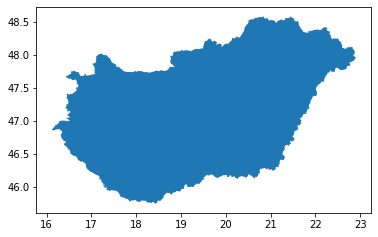

In [3]:
HUN_adm0.plot()

In [14]:
HUN_adm0.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (19.41404 47.16732)
dtype: geometry

In [ ]:
x_map=HUN_adm0.centroid.centroid.x.mean()
y_map=HUN_adm0.centroid.centroid.y.mean()
print(x_map,y_map)

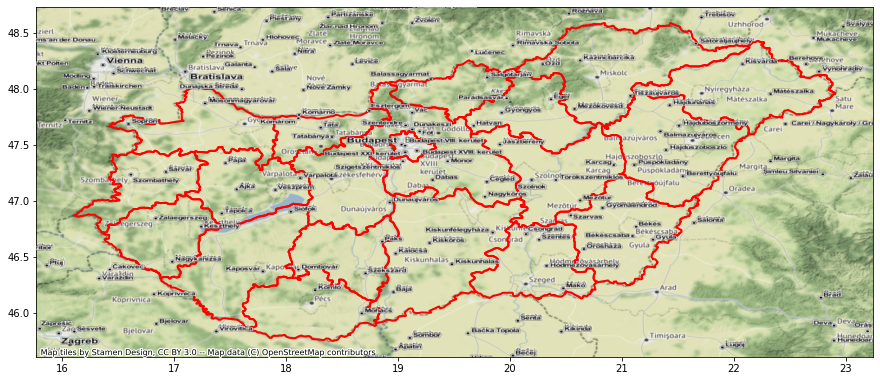

In [179]:
ax = HUN_adm1.plot(figsize=(15,20), color="none", edgecolor="r", linewidth=2)
cx.add_basemap(ax, crs=HUN_adm1.crs.to_string(), source=cx.providers.Stamen.Terrain)
cx.add_basemap(ax, crs=HUN_adm1.crs.to_string(), source=cx.providers.Stamen.TonerLabels)

In [182]:
HUN_adm1

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,103,HUN,Hungary,1,Bács-Kiskun,Megye,County,None,Bacs-Bodrog-Kiskun,"POLYGON ((19.35395 47.08354, 19.35679 47.07944..."
1,103,HUN,Hungary,2,Békés,Megye,County,None,None,"POLYGON ((21.04964 47.20110, 21.05051 47.20098..."
2,103,HUN,Hungary,3,Baranya,Megye,County,None,None,"POLYGON ((18.32680 46.41317, 18.32827 46.41216..."
3,103,HUN,Hungary,4,Borsod-Abaúj-Zemplén,Megye,County,None,None,"POLYGON ((20.84688 48.57425, 20.84576 48.57205..."
4,103,HUN,Hungary,5,Budapest,Fovaros,Capital City,None,Budapeste,"POLYGON ((18.94665 47.37084, 18.94457 47.37318..."
5,103,HUN,Hungary,6,Csongrád,Megye,County,None,None,"POLYGON ((20.09679 46.76449, 20.09865 46.76440..."
6,103,HUN,Hungary,7,Fejér,Megye,County,None,None,"POLYGON ((18.67618 47.57052, 18.67878 47.56631..."
7,103,HUN,Hungary,8,Gyor-Moson-Sopron,Megye,County,None,Gyor-Sopron,"POLYGON ((17.21273 48.02079, 17.22915 48.01846..."
8,103,HUN,Hungary,9,Hajdú-Bihar,Megye,County,None,None,"POLYGON ((21.20159 47.95898, 21.20734 47.95503..."
9,103,HUN,Hungary,10,Heves,Megye,County,None,None,"POLYGON ((20.12139 48.13701, 20.12305 48.13690..."


# ***Load Data HtmL***

In [4]:
hu_1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_towns_of_Hungary')[0]
hu_2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_towns_of_Hungary')[1]
hu_3 = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_towns_of_Hungary')[2]

In [5]:
def data(data):
  data.columns = data.columns.get_level_values(1)
  data.drop(columns='Unnamed: 0_level_1',inplace=True)
  return data

In [6]:
hu_1 = data(hu_1)
hu_2 = data(hu_2)
hu_3 = data(hu_3)

In [7]:
hu_1.head(2)

,City / town,County,1949 Census,1990 Census,2011 Census,2021 Estimate,Peak population,Metropolitan area(2020)
0,Budapest,Budapest (Pest),1590316,2016681,1733685,1723836,"2,113,034 (1989)",3014944
1,Debrecen,Hajdú-Bihar,115399,212235,211340,200974,"217,706 (1994)",325326


In [8]:
hu_2.columns = hu_1.columns

In [9]:
hu_3.drop(columns='Unnamed: 8_level_1',inplace=True)
hu_3['1990 Census'] = hu_3['1949 Census']
hu_3.shape

(16, 8)

In [10]:
hu_3.rename(columns={'Top population': 'Peak population'},inplace=True)

In [11]:
hu_3.columns

Index(['City / town', 'County', '1949 Census', '2011 Census', '2021 Estimate',
       'Peak population', 'Metropolitan area(2021)', '1990 Census'],
      dtype='object')

In [12]:
hu_1.columns

Index(['City / town', 'County', '1949 Census', '1990 Census', '2011 Census',
       '2021 Estimate', 'Peak population', 'Metropolitan area(2020)'],
      dtype='object')

In [13]:
new_cols= ['City / town', 'County', '1949 Census', '1990 Census', '2011 Census','2021 Estimate', 'Peak population','Metropolitan area(2021)']
hu_3 = hu_3.reindex(columns=new_cols)

In [14]:
hu_3.columns = hu_1.columns

In [ ]:
hu_city = pd.concat([hu_1,hu_2, hu_3], ignore_index=True)
hu_city

In [16]:
hu_city.drop([8,20,36],inplace=True)

In [17]:
hu_city[['Peak population', 'Year']] = hu_city['Peak population'].str.split(' ',expand=True)

In [18]:
hu_city['Year'] = hu_city['Year'].astype('str').str.extractall('(\d+)').unstack().astype(int)

In [19]:
hu_city['Peak population'] = hu_city['Peak population'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [20]:
hu_city

,City / town,County,1949 Census,1990 Census,2011 Census,2021 Estimate,Peak population,Metropolitan area(2020),Year
0,Budapest,Budapest (Pest),1590316,2016681,1733685,1723836,2113034,3014944,1989
1,Debrecen,Hajdú-Bihar,115399,212235,211340,200974,217706,325326,1994
2,Szeged,Csongrád-Csanád,104867,175301,168048,159074,178878,242326,1994
3,Miskolc,Borsod-Abaúj-Zemplén,109841,196442,167754,150695,211345,283706,1985
4,Pécs,Baranya,89470,170039,156049,140237,172177,245194,1994
5,Győr,Győr-Moson-Sopron,69583,129331,129527,132735,133946,260024,2020
6,Nyíregyháza,Szabolcs-Szatmár-Bereg,56334,114152,119746,116554,119746,233623,2011
7,Kecskemét,Bács-Kiskun,61730,102516,111411,109651,112233,201156,2010
9,Székesfehérvár,Fejér,42260,108958,100570,95545,109762,271674,1993
10,Szombathely,Vas,47589,85617,78884,78324,85932,148880,1994


In [21]:
hu_city['1949 Census'] = hu_city['1949 Census'].astype(float)
hu_city['1990 Census'] = hu_city['1990 Census'].astype(float)
hu_city['2011 Census'] = hu_city['2011 Census'].astype(float)
hu_city['2021 Estimate'] = hu_city['2021 Estimate'].astype(float)
hu_city['Peak population'] = hu_city['Peak population'].astype(float)

In [22]:
hu_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 35
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City / town              34 non-null     object 
 1   County                   34 non-null     object 
 2   1949 Census              34 non-null     float64
 3   1990 Census              34 non-null     float64
 4   2011 Census              34 non-null     float64
 5   2021 Estimate            34 non-null     float64
 6   Peak population          34 non-null     float64
 7   Metropolitan area(2020)  34 non-null     object 
 8   Year                     34 non-null     int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 2.7+ KB


In [303]:
Haj = pd.DataFrame(hu_city[hu_city['County'] =='Hajdú-Bihar'].sum(axis=0))
Haj = Haj.T
Haj

,City / town,County,1949 Census,1990 Census,2011 Census,2021 Estimate,Peak population,Metropolitan area(2020),Year
0,DebrecenHajdúböszörmény,Hajdú-BiharHajdú-Bihar,145714.0,242550.0,243065.0,230936.0,251391.0,325326-,3954


In [ ]:
dt = []
for i in hu_city['County'].unique():
  data = pd.DataFrame(hu_city[hu_city['County'] ==i].sum(axis=0))
  data = data.T
  dt.append(data)

dt = pd.concat(dt, ignore_index=True)
dt

In [24]:
dt['County']=hu_city['County'].unique()
dt.drop(columns=['Metropolitan area(2020)', 'Year','City / town' ],inplace=True)
dt

,County,1949 Census,1990 Census,2011 Census,2021 Estimate,Peak population
0,Budapest (Pest),1590316.0,2016681.0,1733685.0,1723836.0,2113034.0
1,Hajdú-Bihar,145714.0,242550.0,243065.0,230936.0,251391.0
2,Csongrád-Csanád,154284.0,224718.0,214095.0,201765.0,233364.0
3,Borsod-Abaúj-Zemplén,139025.0,225626.0,202235.0,181929.0,259981.0
4,Baranya,89470.0,170039.0,156049.0,140237.0,172177.0
5,Győr-Moson-Sopron,122635.0,200960.0,222079.0,230074.0,231450.0
6,Szabolcs-Szatmár-Bereg,56334.0,114152.0,119746.0,116554.0,119746.0
7,Bács-Kiskun,89666.0,130452.0,147678.0,143544.0,152055.0
8,Fejér,46209.0,112907.0,149054.0,137681.0,170498.0
9,Vas,47589.0,85617.0,78884.0,78324.0,85932.0


In [25]:
HUN_adm1.rename(columns={'NAME_1': 'County'},inplace=True)

In [46]:
dt['County'].unique()

array(['Budapest (Pest)', 'Hajdú-Bihar', 'Csongrád-Csanád',
       'Borsod-Abaúj-Zemplén', 'Baranya', 'Győr-Moson-Sopron',
       'Szabolcs-Szatmár-Bereg', 'Bács-Kiskun', 'Fejér', 'Vas', 'Pest',
       'Jász-Nagykun-Szolnok', 'Komárom-Esztergom', 'Somogy', 'Veszprém',
       'Békés', 'Zala', 'Heves', 'Nógrád', 'Tolna'], dtype=object)

In [44]:
HUN_adm1['County'].unique()

array(['Bács-Kiskun', 'Békés', 'Baranya', 'Borsod-Abaúj-Zemplén',
       'Budapest', 'Csongrád', 'Fejér', 'Gyor-Moson-Sopron',
       'Hajdú-Bihar', 'Heves', 'Jász-Nagykun-Szolnok',
       'Komárom-Esztergom', 'Nógrád', 'Pest', 'Somogy',
       'Szabolcs-Szatmár-Bereg', 'Tolna', 'Vas', 'Veszprém', 'Zala'],
      dtype=object)

In [51]:
dt['County'].replace({'Győr-Moson-Sopron': 'Gyor-Moson-Sopron'},inplace=True)

In [52]:
df = pd.merge(left=dt,right=HUN_adm1,on = 'County', how = 'inner', indicator=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   County           20 non-null     object  
 1   1949 Census      20 non-null     object  
 2   1990 Census      20 non-null     object  
 3   2011 Census      20 non-null     object  
 4   2021 Estimate    20 non-null     object  
 5   Peak population  20 non-null     object  
 6   ID_0             20 non-null     int64   
 7   ISO              20 non-null     object  
 8   NAME_0           20 non-null     object  
 9   ID_1             20 non-null     int64   
 10  TYPE_1           20 non-null     object  
 11  ENGTYPE_1        20 non-null     object  
 12  NL_NAME_1        0 non-null      object  
 13  VARNAME_1        5 non-null      object  
 14  geometry         20 non-null     geometry
 15  _merge           20 non-null     category
dtypes: category(1), geometry(1), int64(2), object(

In [54]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [55]:
gdf

,County,1949 Census,1990 Census,2011 Census,2021 Estimate,Peak population,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,_merge
0,Budapest,1590316.0,2016681.0,1733685.0,1723836.0,2113034.0,103,HUN,Hungary,5,Fovaros,Capital City,None,Budapeste,"POLYGON ((18.94665 47.37084, 18.94457 47.37318...",both
1,Hajdú-Bihar,145714.0,242550.0,243065.0,230936.0,251391.0,103,HUN,Hungary,9,Megye,County,None,None,"POLYGON ((21.20159 47.95898, 21.20734 47.95503...",both
2,Csongrád,154284.0,224718.0,214095.0,201765.0,233364.0,103,HUN,Hungary,6,Megye,County,None,None,"POLYGON ((20.09679 46.76449, 20.09865 46.76440...",both
3,Borsod-Abaúj-Zemplén,139025.0,225626.0,202235.0,181929.0,259981.0,103,HUN,Hungary,4,Megye,County,None,None,"POLYGON ((20.84688 48.57425, 20.84576 48.57205...",both
4,Baranya,89470.0,170039.0,156049.0,140237.0,172177.0,103,HUN,Hungary,3,Megye,County,None,None,"POLYGON ((18.32680 46.41317, 18.32827 46.41216...",both
5,Gyor-Moson-Sopron,122635.0,200960.0,222079.0,230074.0,231450.0,103,HUN,Hungary,8,Megye,County,None,Gyor-Sopron,"POLYGON ((17.21273 48.02079, 17.22915 48.01846...",both
6,Szabolcs-Szatmár-Bereg,56334.0,114152.0,119746.0,116554.0,119746.0,103,HUN,Hungary,16,Megye,County,None,Szabolcs-Szatmár,"POLYGON ((22.22061 48.42655, 22.23076 48.41722...",both
7,Bács-Kiskun,89666.0,130452.0,147678.0,143544.0,152055.0,103,HUN,Hungary,1,Megye,County,None,Bacs-Bodrog-Kiskun,"POLYGON ((19.35395 47.08354, 19.35679 47.07944...",both
8,Fejér,46209.0,112907.0,149054.0,137681.0,170498.0,103,HUN,Hungary,7,Megye,County,None,None,"POLYGON ((18.67618 47.57052, 18.67878 47.56631...",both
9,Vas,47589.0,85617.0,78884.0,78324.0,85932.0,103,HUN,Hungary,18,Megye,County,None,None,"POLYGON ((17.05032 47.40385, 17.05406 47.40023...",both


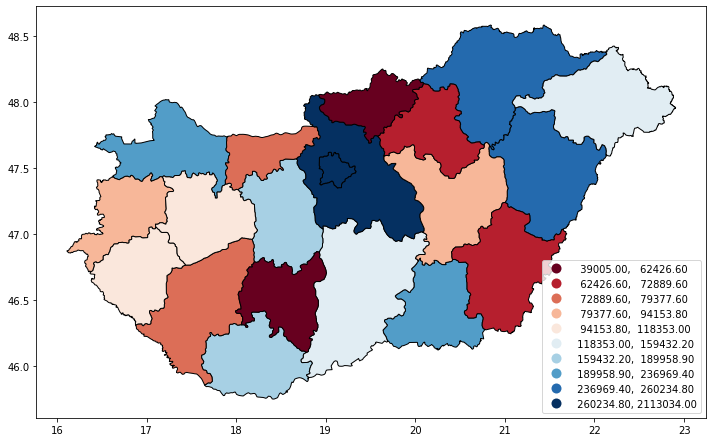

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), edgecolor='k')
gdf.plot(column='Peak population', scheme='quantiles',k=10, cmap=plt.cm.RdBu, edgecolor='k', legend=True, legend_kwds={'loc': 'lower right'}, ax=ax)
fig.show()

In [ ]:
ax = geoplot.kdeplot( gdf, clip=gdf.geometry, shade=True, cmap='Reds', projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(gdf, ax=ax, zorder=1)

Geometry must be a Point or LineString
